<table>
  <tr><td>
    <img src="h11.png">
  </td></tr>
<table>

# Project Presentation Video



In [ ]:
import random
import time
import tensorflow as tf

import tempfile
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import pandas as pd
import seaborn as sns 
%matplotlib inline
from IPython.display import display, Image
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_files       
from keras.utils import np_utils
from sklearn.utils import shuffle

from keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Sequential, save_model,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
from google.colab import drive
#Membuka akses ke google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)
   
    
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/Data Set/Distracted Driver Dataset/imgs/train_data', #change it into your train directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset='training',
    shuffle=True)


val_generator = train_datagen.flow_from_directory(
   '/content/gdrive/MyDrive/Data Set/Distracted Driver Dataset/imgs/train_data', #change it into your train directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    class_mode="categorical",
    subset='validation',
    shuffle=True)


test_generator = test_datagen.flow_from_directory(
   '/content/gdrive/MyDrive/Data Set/Distracted Driver Dataset/imgs/test_data', #change it into your test directory
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    class_mode=None,
    shuffle=False)

Found 17493 images belonging to 10 classes.
Found 4368 images belonging to 10 classes.
Found 15720 images belonging to 1 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape #Print the batch size and labels.

((32, 224, 224, 3), (32, 10))

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'c0': 0, 'c1': 1, 'c2': 2, 'c3': 3, 'c4': 4, 'c5': 5, 'c6': 6, 'c7': 7, 'c8': 8, 'c9': 9}


In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

checkpointer = tf.keras.callbacks.ModelCheckpoint('cnn_stratch_best.hdf5', verbose=1, save_best_only=True)
earlystop = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1)
opt = tf.keras.optimizers.Adam(learning_rate=0.0001) 
model1.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 512)     14336     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 512)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 256)     1179904   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        7

In [ ]:
history = model1.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=10, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator),callbacks=[checkpointer,earlystop])

Epoch 1/10
547/547 [==============================] - 6493s 12s/step - loss: 0.7426 - accuracy: 0.7464 - val_loss: 0.1267 - val_accuracy: 0.9638

Epoch 00001: val_loss improved from inf to 0.12670, saving model to cnn_stratch_best.hdf5
Epoch 2/10
547/547 [==============================] - 311s 569ms/step - loss: 0.0746 - accuracy: 0.9799 - val_loss: 0.0634 - val_accuracy: 0.9831

Epoch 00002: val_loss improved from 0.12670 to 0.06343, saving model to cnn_stratch_best.hdf5
Epoch 3/10
547/547 [==============================] - 325s 594ms/step - loss: 0.0310 - accuracy: 0.9912 - val_loss: 0.0513 - val_accuracy: 0.9872

Epoch 00003: val_loss improved from 0.06343 to 0.05131, saving model to cnn_stratch_best.hdf5
Epoch 4/10
547/547 [==============================] - 323s 591ms/step - loss: 0.0240 - accuracy: 0.9929 - val_loss: 0.0683 - val_accuracy: 0.9837

Epoch 00004: val_loss did not improve from 0.05131
Epoch 5/10
547/547 [==============================] - 323s 591ms/step - loss: 0.0178

In [ ]:
def plot_train_history(history):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

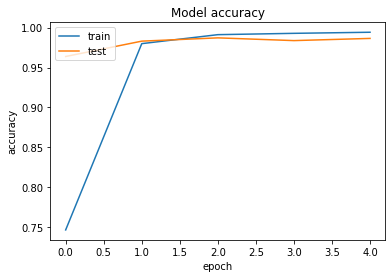

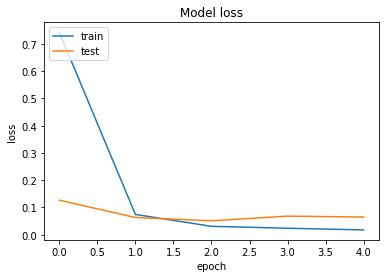

In [ ]:
plot_train_history(history)

In [ ]:
model1.save_weights('model1_weights.h5')
model1.save('model1.h5')

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

mobnet = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE,
                                        include_top=False, 
                                         weights='imagenet')
mobnet.trainable=False

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model2 = tf.keras.Sequential([
  mobnet,
  tf.keras.layers.Conv2D(1024, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('mobnet_wo_ft.hdf5', verbose=1, save_best_only=True)
earlystop = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
model2.compile(optimizer=tf.keras.optimizers.Adam(1e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 1024)        9438208   
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 1024)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 12,677,322
Trainable params: 9,448,458
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
history1 = model2.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=20, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator),callbacks=[checkpointer,earlystop])

Epoch 1/20
547/547 [==============================] - 142s 256ms/step - loss: 0.6869 - accuracy: 0.8305 - val_loss: 0.2124 - val_accuracy: 0.9609

Epoch 00001: val_loss improved from inf to 0.21235, saving model to mobnet_wo_ft.hdf5
Epoch 2/20
547/547 [==============================] - 139s 254ms/step - loss: 0.1480 - accuracy: 0.9719 - val_loss: 0.1227 - val_accuracy: 0.9741

Epoch 00002: val_loss improved from 0.21235 to 0.12272, saving model to mobnet_wo_ft.hdf5
Epoch 3/20
547/547 [==============================] - 139s 254ms/step - loss: 0.0842 - accuracy: 0.9854 - val_loss: 0.0836 - val_accuracy: 0.9824

Epoch 00003: val_loss improved from 0.12272 to 0.08365, saving model to mobnet_wo_ft.hdf5
Epoch 4/20
547/547 [==============================] - 139s 255ms/step - loss: 0.0572 - accuracy: 0.9901 - val_loss: 0.0626 - val_accuracy: 0.9867

Epoch 00004: val_loss improved from 0.08365 to 0.06259, saving model to mobnet_wo_ft.hdf5
Epoch 5/20
547/547 [==============================] - 13

In [ ]:
def plot_train_history(history1):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

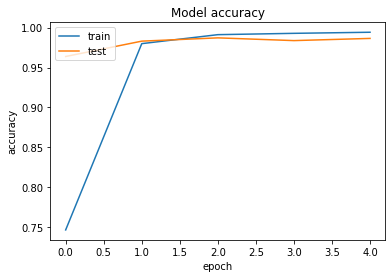

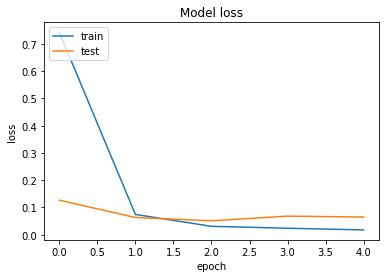

In [ ]:
plot_train_history(history)


In [ ]:
model=tf.keras.models.load_model("./mobnet_wo_ft.hdf5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)  

INFO:tensorflow:Assets written to: /tmp/tmpns71lbra/assets


INFO:tensorflow:Assets written to: /tmp/tmpns71lbra/assets


50600812

In [ ]:
model2.save_weights('model2_weights.h5')
model2.save('model2.h5')